# <font color = yellow><div align = center>PROJECT LUCAS MALT 

Import usual librairies

In [2]:
import numpy as np
import pandas as pd

In [1]:
import pandas as pd
pd.set_option('display.max_info_rows', 500)

# 1/ Get data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_excel('/content/drive/MyDrive/Projet Lucas Malt/DATA_EP20285.xlsx')

In [5]:
df.head()

,Numéro,Observation,Mode de dépôt,Date de dépôt,Heure de dépôt,Code postal,Ville,Modéré,Qualité,Teneur
0,1,Quand on voit l'aménagement du pont de Bellevu...,Formulaire,21/08/2020,08:54,NaN,NaN,False,3 / 10,Plutôt défavorable au projet
1,2,Je suis complètement pour ce projet. Il est né...,Formulaire,21/08/2020,12:11,44300.0,NANTES,False,3 / 10,Plutôt favorable au projet
2,3,"Bonjour,\n\nBien noté la déconstruction du PS3...",Formulaire,21/08/2020,14:59,NaN,NaN,False,3 / 10,Plutôt favorable au projet
3,4,"Bonjour,\n\nJe suis tout a fait pour ce projet...",Formulaire,21/08/2020,17:23,NaN,NaN,False,4 / 10,Plutôt favorable au projet
4,5,"Bonjour, je suis tout à fait partisan du proje...",Formulaire,22/08/2020,22:40,44240.0,LA CHAPELLE SUR ERDRE,False,5 / 10,Plutôt favorable au projet


# 2/ Simple stat Observaation

In [6]:
print("Number of rows : {} and number of columns is : {}".format(df.shape[0],df.shape[1]))
print()
print('--------------------------------------------------------------------')
print("Display of dataset: ")
display(df.head())
print()
print('--------------------------------------------------------------------')
print("Basics statistics: ")
data_desc = df.describe(include='all')
display(data_desc)
print()
print('--------------------------------------------------------------------')
print("Percentage of missing values: ")
display(100*df.isnull().sum()/df.shape[0])

Number of rows : 339 and number of columns is : 10

--------------------------------------------------------------------
Display of dataset: 


,Numéro,Observation,Mode de dépôt,Date de dépôt,Heure de dépôt,Code postal,Ville,Modéré,Qualité,Teneur
0,1,Quand on voit l'aménagement du pont de Bellevu...,Formulaire,21/08/2020,08:54,NaN,NaN,False,3 / 10,Plutôt défavorable au projet
1,2,Je suis complètement pour ce projet. Il est né...,Formulaire,21/08/2020,12:11,44300.0,NANTES,False,3 / 10,Plutôt favorable au projet
2,3,"Bonjour,\n\nBien noté la déconstruction du PS3...",Formulaire,21/08/2020,14:59,NaN,NaN,False,3 / 10,Plutôt favorable au projet
3,4,"Bonjour,\n\nJe suis tout a fait pour ce projet...",Formulaire,21/08/2020,17:23,NaN,NaN,False,4 / 10,Plutôt favorable au projet
4,5,"Bonjour, je suis tout à fait partisan du proje...",Formulaire,22/08/2020,22:40,44240.0,LA CHAPELLE SUR ERDRE,False,5 / 10,Plutôt favorable au projet



--------------------------------------------------------------------
Basics statistics: 


,Numéro,Observation,Mode de dépôt,Date de dépôt,Heure de dépôt,Code postal,Ville,Modéré,Qualité,Teneur
count,339.000000,339,339,339,339,285.000000,224,339,324,325
unique,NaN,313,2,37,261,NaN,24,1,9,3
top,NaN,voir observation du registre en pièce jointe,Formulaire,26/09/2020,16:21,NaN,NANTES,False,5 / 10,Neutre
freq,NaN,10,278,80,6,NaN,119,339,144,220
mean,170.000000,NaN,NaN,NaN,NaN,34996.652632,NaN,NaN,NaN,NaN
std,98.005102,NaN,NaN,NaN,NaN,18473.424554,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,85.500000,NaN,NaN,NaN,NaN,44104.000000,NaN,NaN,NaN,NaN
50%,170.000000,NaN,NaN,NaN,NaN,44240.000000,NaN,NaN,NaN,NaN
75%,254.500000,NaN,NaN,NaN,NaN,44300.000000,NaN,NaN,NaN,NaN



--------------------------------------------------------------------
Percentage of missing values: 


Numéro             0.000000
Observation        0.000000
Mode de dépôt      0.000000
Date de dépôt      0.000000
Heure de dépôt     0.000000
Code postal       15.929204
Ville             33.923304
Modéré             0.000000
Qualité            4.424779
Teneur             4.129794
dtype: float64

In [7]:
df.Teneur.value_counts()

Neutre                          220
Plutôt favorable au projet       76
Plutôt défavorable au projet     29
Name: Teneur, dtype: int64

In [8]:
df.dtypes

Numéro              int64
Observation        object
Mode de dépôt      object
Date de dépôt      object
Heure de dépôt     object
Code postal       float64
Ville              object
Modéré               bool
Qualité            object
Teneur             object
dtype: object

# 3/ Starting to preprocess for a deeplearning model

In [9]:
df2 = pd.DataFrame(df.loc[:,"Observation"], columns =['Observation'])

In [10]:
df2

,Observation
0,Quand on voit l'aménagement du pont de Bellevu...
1,Je suis complètement pour ce projet. Il est né...
2,"Bonjour,\n\nBien noté la déconstruction du PS3..."
3,"Bonjour,\n\nJe suis tout a fait pour ce projet..."
4,"Bonjour, je suis tout à fait partisan du proje..."
...,...
334,"\nBonjour,\nHabitants Gesvrine, nous craignons..."
335,"Contribution des élus LCEA\n\nBonjour,\n\nci-j..."
336,voir observation du registre en pièce jointe
337,"Bonjour,\nJe n'ai rien contre aménagement de l..."


In [11]:
df2.iloc[25, 0]

'Le périphérique extérieur et l’A11 venant de Paris vont se rejoindre sur 4 voies puis se réduire à 3 puis 2 voies. Ne faudrait il pas prolonger sur 3 voies jusqu’a la sortie de Rennes pour limiter l’effet entonnoir ?'

In [12]:
df2['clean_documents'] = df2.Observation.apply(lambda x: x.replace("d'", "").replace("l'", "").replace("\n", " "))
df2['clean_documents+'] = df2['clean_documents'].fillna('').apply(lambda x: x.lower().strip())

df2.head()

,Observation,clean_documents,clean_documents+
0,Quand on voit l'aménagement du pont de Bellevu...,Quand on voit aménagement du pont de Bellevue ...,quand on voit aménagement du pont de bellevue ...
1,Je suis complètement pour ce projet. Il est né...,Je suis complètement pour ce projet. Il est né...,je suis complètement pour ce projet. il est né...
2,"Bonjour,\n\nBien noté la déconstruction du PS3...","Bonjour, Bien noté la déconstruction du PS3. ...","bonjour, bien noté la déconstruction du ps3. ..."
3,"Bonjour,\n\nJe suis tout a fait pour ce projet...","Bonjour, Je suis tout a fait pour ce projet q...","bonjour, je suis tout a fait pour ce projet q..."
4,"Bonjour, je suis tout à fait partisan du proje...","Bonjour, je suis tout à fait partisan du proje...","bonjour, je suis tout à fait partisan du proje..."


In [13]:
df2.iloc[4, 2]

'bonjour, je suis tout à fait partisan du projet qui va dans le bon sens, pour l utiliser tous les jours . ceci dit ,  je trouve juste dommage que le projet n aille pas jusqu’à la porte de rennes en 2x3 voies. en effet nous avons un traffic sur 2 vois venant de l autoroute, un autre de 2 voies venant du périphérique. cela font 4 voies qui se regroupe sur 2 voies jusqu’à la prochaine sortie de la route de rennes.  ne pensez-vous pas retrouver l engorgement habituel après la porte de gesvre.  ainsi le périphérique serait en 2x3 voies de la porte-de-gesvres à la porte d orvault permettant aux usagers venant de l autoroute de ne pas être perturbé par un flux du périphérique.'

In [14]:
# Import spacy, if you don't have it --> !pip install spacy 
import spacy
spacy.__version__
!python -m spacy download fr_core_news_sm -q
# Import English using en_core_web_sm.load()
import fr_core_news_sm
nlp = fr_core_news_sm.load()

     |████████████████████████████████| 14.7MB 4.1MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('fr_core_news_sm')


In [15]:
## Import stop words from spacy 
from spacy.lang.fr.stop_words import STOP_WORDS

## Tokenize the cleaned document
tokenized_doc = df2['clean_documents+'].fillna('').apply(lambda x: nlp(x))

# remove stop-words
tokenized_doc = tokenized_doc.apply(lambda x: [token.lemma_ for token in x if token.text not in STOP_WORDS])
tokenized_doc

0      [voir, aménagement, pont, bellevue, porte, anj...
1      [complètement, projet, ., nécessaire, réaménag...
2      [bonjour, ,,  , noter, déconstruction, ps3, .,...
3      [bonjour, ,,  , projet, indispensable, ., ,, t...
4      [bonjour, ,, partisan, projet, bon, sens, ,, l...
                             ...                        
334    [bonjour, ,, habitant, gesvrine, ,, craindre, ...
335    [contribution, élu, lcea,  , bonjour, ,,  , -,...
336        [voir, observation, registre, pièce, joindre]
337    [bonjour, ,, aménagement, porte, gevre, ., rev...
338    [partager, totalement, point, vue, émettre, ca...
Name: clean_documents+, Length: 339, dtype: object

In [16]:
tokenized_doc_clean = [[word for word in x if word.isalpha() and word.isidentifier()] for x in tokenized_doc]
tokenized_doc_clean[5]

['bonjour',
 'étonner',
 'réfection',
 'total',
 'pont',
 'route',
 'chapelle',
 'erdre',
 'accompagne',
 'mise',
 'place',
 'voie',
 'mode',
 'actif',
 'respecter',
 'propre',
 'cahier',
 'charge',
 'nantes',
 'métropole',
 'vouloir',
 'bidirectionnelle',
 'réserver',
 'vélos',
 'mètre',
 'large',
 'ici',
 'envisager',
 'voie',
 'vert',
 'partager',
 'piéton',
 'm',
 'largement',
 'insuffiser',
 'garantir',
 'conflit',
 'usag',
 'solution',
 'mètre',
 'bidirectionnelle',
 'mini',
 'plus',
 'piéton',
 'faire',
 'choix',
 'politique',
 'financier',
 'réfection',
 'pont',
 'assurer',
 'techniquemer',
 'possibilité',
 'pont',
 'construire',
 'génération',
 'venir',
 'capable',
 'faire',
 'face',
 'enjeux',
 'fort',
 'croissance',
 'trafic',
 'cycle',
 'cordialement',
 'julien',
 'lr']

In [17]:
for x in tokenized_doc_clean:
    for word in x:
      if len(word) <= 2:
        x.remove(word)

In [18]:
tokenized_doc_clean[5]

['bonjour',
 'étonner',
 'réfection',
 'total',
 'pont',
 'route',
 'chapelle',
 'erdre',
 'accompagne',
 'mise',
 'place',
 'voie',
 'mode',
 'actif',
 'respecter',
 'propre',
 'cahier',
 'charge',
 'nantes',
 'métropole',
 'vouloir',
 'bidirectionnelle',
 'réserver',
 'vélos',
 'mètre',
 'large',
 'ici',
 'envisager',
 'voie',
 'vert',
 'partager',
 'piéton',
 'largement',
 'insuffiser',
 'garantir',
 'conflit',
 'usag',
 'solution',
 'mètre',
 'bidirectionnelle',
 'mini',
 'plus',
 'piéton',
 'faire',
 'choix',
 'politique',
 'financier',
 'réfection',
 'pont',
 'assurer',
 'techniquemer',
 'possibilité',
 'pont',
 'construire',
 'génération',
 'venir',
 'capable',
 'faire',
 'face',
 'enjeux',
 'fort',
 'croissance',
 'trafic',
 'cycle',
 'cordialement',
 'julien']

In [19]:
df2['clean_token'] = tokenized_doc_clean
df2.head()

,Observation,clean_documents,clean_documents+,clean_token
0,Quand on voit l'aménagement du pont de Bellevu...,Quand on voit aménagement du pont de Bellevue ...,quand on voit aménagement du pont de bellevue ...,"[voir, aménagement, pont, bellevue, porte, anj..."
1,Je suis complètement pour ce projet. Il est né...,Je suis complètement pour ce projet. Il est né...,je suis complètement pour ce projet. il est né...,"[complètement, projet, nécessaire, réaménager,..."
2,"Bonjour,\n\nBien noté la déconstruction du PS3...","Bonjour, Bien noté la déconstruction du PS3. ...","bonjour, bien noté la déconstruction du ps3. ...","[bonjour, noter, déconstruction, planning, pré..."
3,"Bonjour,\n\nJe suis tout a fait pour ce projet...","Bonjour, Je suis tout a fait pour ce projet q...","bonjour, je suis tout a fait pour ce projet q...","[bonjour, projet, indispensable, trouve, proje..."
4,"Bonjour, je suis tout à fait partisan du proje...","Bonjour, je suis tout à fait partisan du proje...","bonjour, je suis tout à fait partisan du proje...","[bonjour, partisan, projet, bon, sens, utilise..."


In [20]:
df2['clean_document'] = df2['clean_token'].str.join(' ').str.strip()
df2.head()

,Observation,clean_documents,clean_documents+,clean_token,clean_document
0,Quand on voit l'aménagement du pont de Bellevu...,Quand on voit aménagement du pont de Bellevue ...,quand on voit aménagement du pont de bellevue ...,"[voir, aménagement, pont, bellevue, porte, anj...",voir aménagement pont bellevue porte anjou dur...
1,Je suis complètement pour ce projet. Il est né...,Je suis complètement pour ce projet. Il est né...,je suis complètement pour ce projet. il est né...,"[complètement, projet, nécessaire, réaménager,...",complètement projet nécessaire réaménager port...
2,"Bonjour,\n\nBien noté la déconstruction du PS3...","Bonjour, Bien noté la déconstruction du PS3. ...","bonjour, bien noté la déconstruction du ps3. ...","[bonjour, noter, déconstruction, planning, pré...",bonjour noter déconstruction planning prévisio...
3,"Bonjour,\n\nJe suis tout a fait pour ce projet...","Bonjour, Je suis tout a fait pour ce projet q...","bonjour, je suis tout a fait pour ce projet q...","[bonjour, projet, indispensable, trouve, proje...",bonjour projet indispensable trouve projet pré...
4,"Bonjour, je suis tout à fait partisan du proje...","Bonjour, je suis tout à fait partisan du proje...","bonjour, je suis tout à fait partisan du proje...","[bonjour, partisan, projet, bon, sens, utilise...",bonjour partisan projet bon sens utiliser jour...


In [21]:
def remove_bonjour(texte):
  if "bonjour" in texte:
    texte = texte.split("onjour")[1]
  return texte

In [22]:
def remove_cordialement(texte):
  if 'cordialement' in texte:
    texte = texte.split("cordialemen")[0]
  return texte

In [23]:
df2["clean_document+"] = df2["clean_document"].apply(lambda x: remove_bonjour(x))
df2["clean_document++"] = df2["clean_document+"].apply(lambda x: remove_cordialement(x))

In [24]:
vision = df2.iloc[1,-1]
vision

'complètement projet nécessaire réaménager porte gesvre complètement saturer heure pointe passage voie indispensable hâter travail commencent être terminer circulation fluide arrêter perdre temps route matin soir falloir éviter multiple changement vitesse induisent ralentissement accélération embouteillages'

In [25]:
df2.head()

,Observation,clean_documents,clean_documents+,clean_token,clean_document,clean_document+,clean_document++
0,Quand on voit l'aménagement du pont de Bellevu...,Quand on voit aménagement du pont de Bellevue ...,quand on voit aménagement du pont de bellevue ...,"[voir, aménagement, pont, bellevue, porte, anj...",voir aménagement pont bellevue porte anjou dur...,voir aménagement pont bellevue porte anjou dur...,voir aménagement pont bellevue porte anjou dur...
1,Je suis complètement pour ce projet. Il est né...,Je suis complètement pour ce projet. Il est né...,je suis complètement pour ce projet. il est né...,"[complètement, projet, nécessaire, réaménager,...",complètement projet nécessaire réaménager port...,complètement projet nécessaire réaménager port...,complètement projet nécessaire réaménager port...
2,"Bonjour,\n\nBien noté la déconstruction du PS3...","Bonjour, Bien noté la déconstruction du PS3. ...","bonjour, bien noté la déconstruction du ps3. ...","[bonjour, noter, déconstruction, planning, pré...",bonjour noter déconstruction planning prévisio...,noter déconstruction planning prévisionnel no...,noter déconstruction planning prévisionnel no...
3,"Bonjour,\n\nJe suis tout a fait pour ce projet...","Bonjour, Je suis tout a fait pour ce projet q...","bonjour, je suis tout a fait pour ce projet q...","[bonjour, projet, indispensable, trouve, proje...",bonjour projet indispensable trouve projet pré...,projet indispensable trouve projet prévoir ma...,projet indispensable trouve projet prévoir ma...
4,"Bonjour, je suis tout à fait partisan du proje...","Bonjour, je suis tout à fait partisan du proje...","bonjour, je suis tout à fait partisan du proje...","[bonjour, partisan, projet, bon, sens, utilise...",bonjour partisan projet bon sens utiliser jour...,partisan projet bon sens utiliser jour trouve...,partisan projet bon sens utiliser jour trouve...


In [26]:
# Let's take the columns we're interested in 
df_final = df2[["clean_document++"]]
df_final['Sentiment'] = df.Teneur
df_final

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,clean_document++,Sentiment
0,voir aménagement pont bellevue porte anjou dur...,Plutôt défavorable au projet
1,complètement projet nécessaire réaménager port...,Plutôt favorable au projet
2,noter déconstruction planning prévisionnel no...,Plutôt favorable au projet
3,projet indispensable trouve projet prévoir ma...,Plutôt favorable au projet
4,partisan projet bon sens utiliser jour trouve...,Plutôt favorable au projet
...,...,...
334,habitant gesvrine craindre fortement travail ...,Neutre
335,joint trouver contribution élu groupe chapell...,NaN
336,voir observation registre pièce joindre,Plutôt favorable au projet
337,aménagement porte gevre revanche refair pont ...,Plutôt favorable au projet


In [27]:
df_final.Sentiment.value_counts()

Neutre                          220
Plutôt favorable au projet       76
Plutôt défavorable au projet     29
Name: Sentiment, dtype: int64

In [28]:
df_final['clean_document++'] = df_final['clean_document++'].apply(lambda x: x.replace('voir observation registre pièce joindre', '++'))
df_final

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,clean_document++,Sentiment
0,voir aménagement pont bellevue porte anjou dur...,Plutôt défavorable au projet
1,complètement projet nécessaire réaménager port...,Plutôt favorable au projet
2,noter déconstruction planning prévisionnel no...,Plutôt favorable au projet
3,projet indispensable trouve projet prévoir ma...,Plutôt favorable au projet
4,partisan projet bon sens utiliser jour trouve...,Plutôt favorable au projet
...,...,...
334,habitant gesvrine craindre fortement travail ...,Neutre
335,joint trouver contribution élu groupe chapell...,NaN
336,++,Plutôt favorable au projet
337,aménagement porte gevre revanche refair pont ...,Plutôt favorable au projet


In [29]:
delete_row = df_final.loc[df_final["clean_document++"] == "++"].index
delete_row

Int64Index([323, 324, 325, 326, 327, 328, 329, 332, 333, 336], dtype='int64')

In [30]:
df_final = df_final.loc[df_final.index.drop(list(delete_row))]
df_final = df_final.dropna(axis = 0)
df_final

,clean_document++,Sentiment
0,voir aménagement pont bellevue porte anjou dur...,Plutôt défavorable au projet
1,complètement projet nécessaire réaménager port...,Plutôt favorable au projet
2,noter déconstruction planning prévisionnel no...,Plutôt favorable au projet
3,projet indispensable trouve projet prévoir ma...,Plutôt favorable au projet
4,partisan projet bon sens utiliser jour trouve...,Plutôt favorable au projet
...,...,...
330,utilisateur quotidien porte gesvre anticiper ...,Plutôt favorable au projet
331,contribution elu chapelle action groupe minori...,Plutôt favorable au projet
334,habitant gesvrine craindre fortement travail ...,Neutre
337,aménagement porte gevre revanche refair pont ...,Plutôt favorable au projet


In [31]:
df_final = df_final.reset_index()
df_final.tail()

,index,clean_document++,Sentiment
310,330,utilisateur quotidien porte gesvre anticiper ...,Plutôt favorable au projet
311,331,contribution elu chapelle action groupe minori...,Plutôt favorable au projet
312,334,habitant gesvrine craindre fortement travail ...,Neutre
313,337,aménagement porte gevre revanche refair pont ...,Plutôt favorable au projet
314,338,partager totalement point vue émettre cadre pé...,Neutre


In [32]:
df_final = df_final.drop(columns = ['index'])
df_final

,clean_document++,Sentiment
0,voir aménagement pont bellevue porte anjou dur...,Plutôt défavorable au projet
1,complètement projet nécessaire réaménager port...,Plutôt favorable au projet
2,noter déconstruction planning prévisionnel no...,Plutôt favorable au projet
3,projet indispensable trouve projet prévoir ma...,Plutôt favorable au projet
4,partisan projet bon sens utiliser jour trouve...,Plutôt favorable au projet
...,...,...
310,utilisateur quotidien porte gesvre anticiper ...,Plutôt favorable au projet
311,contribution elu chapelle action groupe minori...,Plutôt favorable au projet
312,habitant gesvrine craindre fortement travail ...,Neutre
313,aménagement porte gevre revanche refair pont ...,Plutôt favorable au projet


In [33]:
from sklearn import preprocessing, model_selection
df_final['Sentiment'] = df_final['Sentiment'].apply(lambda x: str(x))

In [34]:
le = preprocessing.LabelEncoder()
le.fit(df_final['Sentiment'])
labels = le.transform(df_final['Sentiment'])
df_final['Sentiments'] = labels

In [35]:
df_final = df_final.drop(columns = ['Sentiment'])

In [36]:
df_final.head()

,clean_document++,Sentiments
0,voir aménagement pont bellevue porte anjou dur...,1
1,complètement projet nécessaire réaménager port...,2
2,noter déconstruction planning prévisionnel no...,2
3,projet indispensable trouve projet prévoir ma...,2
4,partisan projet bon sens utiliser jour trouve...,2


In [37]:
df_final.Sentiments.value_counts()

0    217
2     73
1     25
Name: Sentiments, dtype: int64

# 4/ Preprocess for DL

In [38]:
# create a tokenizer instance
import tensorflow as tf
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer

In [39]:
tokenizer.fit_on_texts(df_final['clean_document++'])

In [40]:
tokenizer.word_index

{'travail': 1,
 'voie': 2,
 'pont': 3,
 'chapelle': 4,
 'porte': 5,
 'chaillou': 6,
 'nante': 7,
 'périphérique': 8,
 'projet': 9,
 'hameau': 10,
 'route': 11,
 'gesvre': 12,
 'public': 13,
 'angl': 14,
 'circulation': 15,
 'angle': 16,
 'demander': 17,
 'place': 18,
 'erdre': 19,
 'cyclable': 20,
 'enquête': 21,
 'habitant': 22,
 'nord': 23,
 'aménagement': 24,
 'trafic': 25,
 'autoroute': 26,
 'prévoir': 27,
 'point': 28,
 'prendre': 29,
 'faire': 30,
 'zone': 31,
 'mesure': 32,
 'métropole': 33,
 'mise': 34,
 'solution': 35,
 'déjà': 36,
 'être': 37,
 'bouchon': 38,
 'temps': 39,
 'actuel': 40,
 'falloir': 41,
 'long': 42,
 'usager': 43,
 'voiture': 44,
 'fermeture': 45,
 'vélo': 46,
 'renne': 47,
 'cycliste': 48,
 'commun': 49,
 'ligne': 50,
 'transport': 51,
 'préserver': 52,
 'durée': 53,
 'permettre': 54,
 'piéton': 55,
 'mettre': 56,
 'mur': 57,
 'bruit': 58,
 'pouvoir': 59,
 'quartier': 60,
 'mois': 61,
 'devoir': 62,
 'dossier': 63,
 'passerelle': 64,
 'plum': 65,
 'dernier':

In [41]:
df_final['clean_document++']= tokenizer.texts_to_sequences(df_final['clean_document++'])
df_final.head()

,clean_document++,Sentiments
0,"[174, 24, 3, 578, 5, 1092, 53, 1, 649, 450, 15...",1
1,"[402, 9, 90, 1093, 5, 12, 402, 224, 68, 166, 9...",2
2,"[738, 1548, 650, 1096, 887, 888, 1097, 335, 15...",2
3,"[9, 175, 281, 9, 27, 652, 889, 1553, 890, 316,...",2
4,"[1563, 9, 91, 177, 240, 78, 281, 653, 9, 1102,...",2


In [107]:
X = df_final['clean_document++']
Y = df_final['Sentiments']

In [188]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2,shuffle=True, stratify = Y)

In [189]:
X_train.shape

(220,)

In [190]:
reviews_pad_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, padding="post")

In [191]:
reviews_pad_train.shape

(220, 739)

In [192]:
reviews_pad_test = tf.keras.preprocessing.sequence.pad_sequences(X_test,maxlen=739)

In [193]:
reviews_pad_test.shape

(95, 739)

In [194]:
train_encoded_data = tf.data.Dataset.from_tensor_slices((reviews_pad_train, y_train.values))
test_encoded_data = tf.data.Dataset.from_tensor_slices((reviews_pad_test, y_test.values))

In [195]:
train_encoded_data = train_encoded_data.shuffle(len(train_encoded_data))
train_data = train_encoded_data.batch(4)

test_data = test_encoded_data.batch(4)

In [196]:
 # Let's look at a batch 
for review, star in train_data.take(1):
  print(review)

tf.Tensor(
[[  83   83  175 ...    0    0    0]
 [1691    2   20 ...    0    0    0]
 [ 227  207   16 ...    0    0    0]
 [ 287  236   16 ...    0    0    0]], shape=(4, 739), dtype=int32)


In [197]:
train_data 

<BatchDataset shapes: ((None, 739), (None,)), types: (tf.int32, tf.int64)>

In [198]:
review.shape[1]

739

# MODEL

In [199]:
vocab_size = len(tokenizer.word_index)

In [200]:
vocab_size

3084

In [212]:
model = tf.keras.Sequential([
                  # Couche d'Input Word Embedding           
                  tf.keras.layers.Embedding(vocab_size+1, 64, input_shape=[review.shape[1],]),
                
                  # Couche CNN
                  tf.keras.layers.Conv1D(16, 3, activation="relu"),

                  # flatten output
                  tf.keras.layers.Flatten()  ,           

                  # Couche Dense classique 
                  tf.keras.layers.Dense(64, activation='relu'),
                  tf.keras.layers.Dense(32, activation='relu'),
                  tf.keras.layers.Dense(16, activation='relu'),
                  tf.keras.layers.Dense(8, activation='relu'),
                  tf.keras.layers.Dropout(0.5),

                  # Couche de sortie avec le nombre de neurones en sortie égale au nombre de classe avec fonction softmax
                  tf.keras.layers.Dense(3, activation="softmax")
                                              
])

In [213]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 739, 64)           197440    
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 737, 16)           3088      
_________________________________________________________________
flatten_8 (Flatten)          (None, 11792)             0         
_________________________________________________________________
dense_40 (Dense)             (None, 64)                754752    
_________________________________________________________________
dense_41 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_42 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_43 (Dense)             (None, 8)                

In [214]:
import keras.backend as K

def f1_metric(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val
    
    


In [215]:
# Créons un learning rate schedule pour décroitre le learning rate à mesure que nous entrainons le modèle 
initial_learning_rate = 0.1

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=1000,
    decay_rate=0.96,
    staircase=True)

# Utilisation d'un compileur simple avec un optimiseur Adam pour le calcul de nos gradients 
optimizer= tf.keras.optimizers.Adam(
    learning_rate = lr_schedule
)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy', f1_metric])

In [ ]:
history = model.fit(train_data, epochs=40, validation_data=test_data)

Epoch 1/40
55/55 [==============================] - 2s 20ms/step - loss: 255.9379 - accuracy: 0.6220 - f1_metric: 1.0600 - val_loss: 0.8070 - val_accuracy: 0.6842 - val_f1_metric: 0.4492
Epoch 2/40
55/55 [==============================] - 1s 16ms/step - loss: 0.8551 - accuracy: 0.6809 - f1_metric: 0.4445 - val_loss: 0.8194 - val_accuracy: 0.6842 - val_f1_metric: 0.7754
Epoch 3/40
55/55 [==============================] - 1s 16ms/step - loss: 0.7511 - accuracy: 0.7049 - f1_metric: 0.6760 - val_loss: 0.8078 - val_accuracy: 0.6842 - val_f1_metric: 0.4492
Epoch 4/40
55/55 [==============================] - 1s 18ms/step - loss: 0.8526 - accuracy: 0.6548 - f1_metric: 0.4760 - val_loss: 0.8205 - val_accuracy: 0.6842 - val_f1_metric: 0.4492
Epoch 5/40
55/55 [==============================] - 1s 19ms/step - loss: 0.8168 - accuracy: 0.6795 - f1_metric: 0.4883 - val_loss: 0.8075 - val_accuracy: 0.6842 - val_f1_metric: 0.4492
Epoch 6/40
55/55 [==============================] - 1s 18ms/step - loss: 

55/55 [==============================] - 1s 17ms/step - loss: 0.8332 - accuracy: 0.6752 - f1_metric: 0.6301 - val_loss: 0.8077 - val_accuracy: 0.6842 - val_f1_metric: 0.7754


55/55 [==============================] - 1s 17ms/step - loss: 0.7998 - accuracy: 0.6909 - f1_metric: 0.5458 - val_loss: 0.8140 - val_accuracy: 0.6842 - val_f1_metric: 0.407

In [210]:
model.evaluate(test_data)

24/24 [==============================] - 0s 3ms/step - loss: 0.8077 - accuracy: 0.6842 - f1_metric: 0.7754


[0.8077347874641418, 0.6842105388641357, 0.7753967642784119]

In [208]:
predictions = model.predict(test_data)

In [209]:
np.mean(predictions)

0.33333334

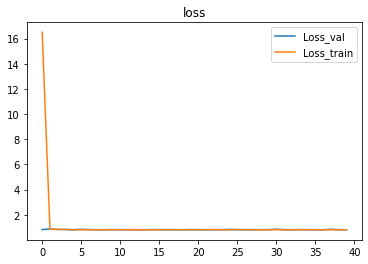

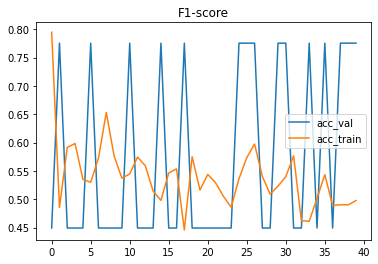

In [206]:
import matplotlib.pyplot as plt


loss_curve = history.history["loss"]
loss_val = history.history["val_loss"]
acc_curve = history.history["f1_metric"]
acc_val = history.history["val_f1_metric"]

plt.plot(loss_val,label="Loss_val")
plt.plot(loss_curve,label="Loss_train")
plt.legend()
plt.title("loss")
plt.show()

plt.plot(acc_val, label="acc_val" )
plt.plot(acc_curve, label="acc_train" )
plt.legend()
plt.title("F1-score")
plt.show()